In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
font_dir = ['C:/python/fonts']
for font in mpl.font_manager.findSystemFonts(fontpaths = font_dir):
    mpl.font_manager.fontManager.addfont(font)

In [3]:
# Set font family globally
mpl.rcParams['font.family'] = 'maruburi'
print(mpl.rcParams['font.family'])

['maruburi']


In [4]:
mpl.rc('axes', unicode_minus = False)

In [5]:
%matplotlib inline

# car_crashes 데이터 분석

In [6]:
df = sns.load_dataset('car_crashes')
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total           51 non-null     float64
 1   speeding        51 non-null     float64
 2   alcohol         51 non-null     float64
 3   not_distracted  51 non-null     float64
 4   no_previous     51 non-null     float64
 5   ins_premium     51 non-null     float64
 6   ins_losses      51 non-null     float64
 7   abbrev          51 non-null     object 
dtypes: float64(7), object(1)
memory usage: 3.3+ KB


In [8]:
# · total -> Number of drivers involved in fatal collisions per billion miles 
#            (5.900–23.900)

# · speeding -> Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding 
#               (1.792–9.450)

# · alcohol -> Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired 
#              (1.593–10.038)

# · not_distracted -> Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted 
#                     (1.760–23.661)

# · no_previous -> Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents 
#                  (5.900–21.280)

# · ins_premium -> Car Insurance Premiums (641.960–1301.520)

# · ins_losses -> Losses incurred by insurance companies for collisions per insured driver 
#                (82.75–194.780)

# · abbrev -> USA states

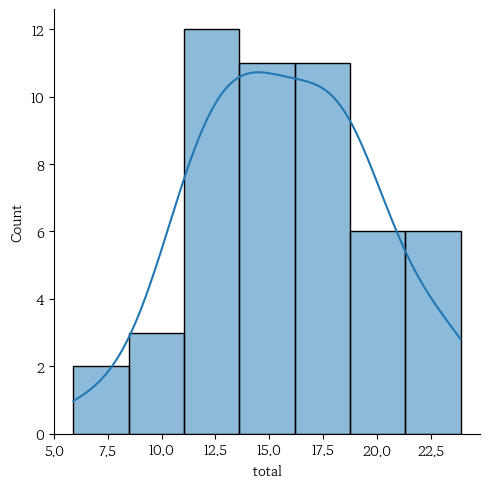

In [9]:
sns.displot(df.total, kde = True)
# 사고율의 분포
# 현재 billion mile당 사고율은 12.5가 가장 많다.

<AxesSubplot:xlabel='total', ylabel='abbrev'>

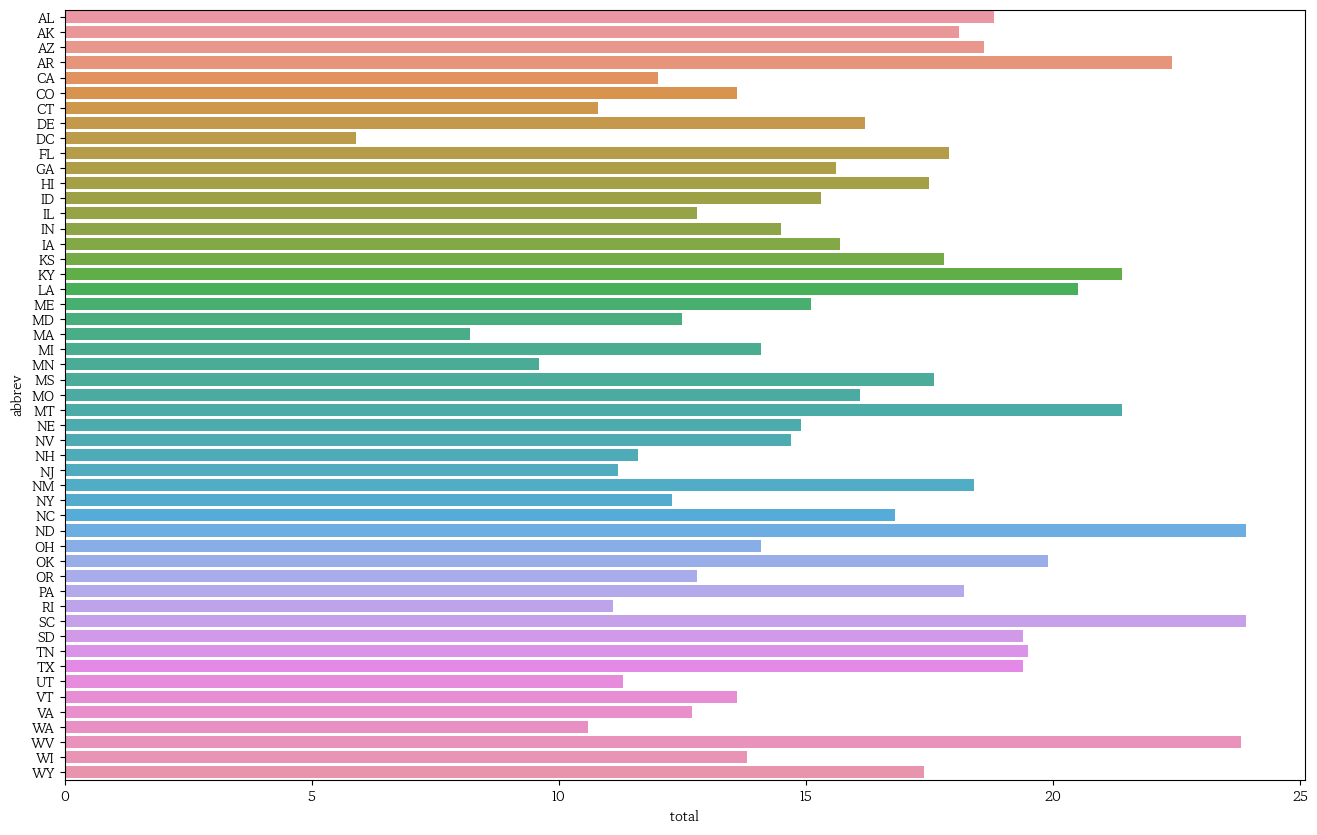

In [10]:
# 1. 미국 주별 총 교통 사고의 수

plt.subplots(figsize=(16,10))
sns.barplot(x='total',y= 'abbrev',data=df,orient='h')

In [11]:
df.nlargest(1, columns = ['total'])
# 미국 주 중에서 North Dakota가 사고율 23.9로 가장 높다.

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
34,23.9,5.497,10.038,23.661,20.554,688.75,109.72,ND


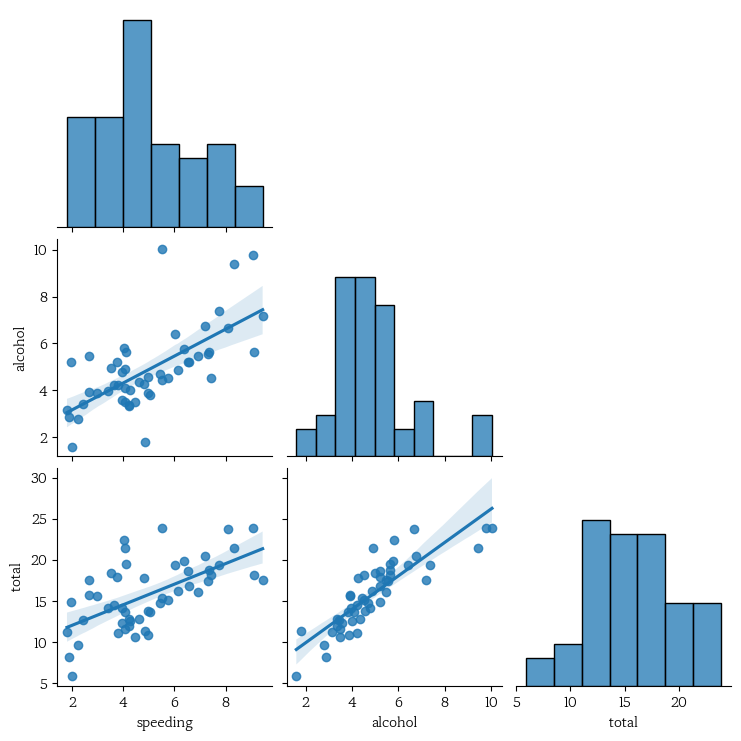

In [12]:
sns.pairplot(
    df,
    x_vars = ['speeding', 'alcohol', 'total'],
    y_vars = ['speeding', 'alcohol', 'total'],
    kind = 'reg', corner = True
)

# 교통사고 요인을 보면 알코올이 과속보다 더 기울기가 가파르기 때문에 관계가 깊다고 할 수 있다.